# Sales Report Analysis

## Import Library

In [1]:
import pandas as pd
import numpy as np

## Import Data

In [2]:
df1 = pd.read_excel('sales_report1.xlsx')
df2 = pd.read_excel('product_inv.xlsx')

display(df1,df2)

,Sales Name,Purchase Date,Product Type,Unit Price (US$),Quantity
0,Brown,2018-06-01,iPhone 8 Rose Gold,1000,3
1,Brown,2018-06-06,LG TV G1000,2500,5
2,Jones,2018-06-05,Sharp Refrigerator FL1082,300,2
3,William,2018-06-05,Panasonic Air Purifier BVX9,250,4
4,William,2018-06-02,Canon Mirrorless Camera 18MP,950,8
5,Jones,2018-06-08,Electrolux Blender,95,4
6,Jones,2018-06-09,Oxone Oven X100,1500,2
7,Jones,2018-06-04,HP Notebook AMQ,370,1


,Product Type,Item ID
0,Panasonic Air Purifier BVX9,9OPER4
1,HP Notebook AMQ,Y209LD3
2,Canon Mirrorless Camera 18MP,33KLRE5
3,iPhone 8 Rose Gold,IP20008
4,Sharp Refrigerator FL1082,11HYAEP
5,Electrolux Blender,N5012FL
6,Oxone Oven X100,VXC3019
7,LG TV G1000,EXTY500


## Merge Table

In [4]:
df3 = pd.merge(df1, df2, how='outer')
df3.head()

,Sales Name,Purchase Date,Product Type,Unit Price (US$),Quantity,Item ID
0,Brown,2018-06-01,iPhone 8 Rose Gold,1000,3,IP20008
1,Brown,2018-06-06,LG TV G1000,2500,5,EXTY500
2,Jones,2018-06-05,Sharp Refrigerator FL1082,300,2,11HYAEP
3,William,2018-06-05,Panasonic Air Purifier BVX9,250,4,9OPER4
4,William,2018-06-02,Canon Mirrorless Camera 18MP,950,8,33KLRE5


## Calculate Sales

In [5]:
df3['Sales (US$)'] = df3['Unit Price (US$)'] * df3['Quantity']
df3.head()

,Sales Name,Purchase Date,Product Type,Unit Price (US$),Quantity,Item ID,Sales (US$)
0,Brown,2018-06-01,iPhone 8 Rose Gold,1000,3,IP20008,3000
1,Brown,2018-06-06,LG TV G1000,2500,5,EXTY500,12500
2,Jones,2018-06-05,Sharp Refrigerator FL1082,300,2,11HYAEP,600
3,William,2018-06-05,Panasonic Air Purifier BVX9,250,4,9OPER4,1000
4,William,2018-06-02,Canon Mirrorless Camera 18MP,950,8,33KLRE5,7600


## Calculate Incentive

In [6]:
def conditions(s):
    if s['Sales (US$)'] >= 2000:
        return s['Sales (US$)']* 0.05
    elif s['Sales (US$)'] >= 5000:
        return s['Sales (US$)']* 0.1
    elif s['Sales (US$)'] >= 10000:
        return s['Sales (US$)']* 0.2

In [7]:
df3['Incentive(US$)'] = df3.apply(conditions, axis=1)
df3.head()

,Sales Name,Purchase Date,Product Type,Unit Price (US$),Quantity,Item ID,Sales (US$),Incentive(US$)
0,Brown,2018-06-01,iPhone 8 Rose Gold,1000,3,IP20008,3000,150.0
1,Brown,2018-06-06,LG TV G1000,2500,5,EXTY500,12500,625.0
2,Jones,2018-06-05,Sharp Refrigerator FL1082,300,2,11HYAEP,600,NaN
3,William,2018-06-05,Panasonic Air Purifier BVX9,250,4,9OPER4,1000,NaN
4,William,2018-06-02,Canon Mirrorless Camera 18MP,950,8,33KLRE5,7600,380.0


## Visualisation

In [8]:
df4 = df3[['Sales Name', 'Sales (US$)']]
df4.head(8)

,Sales Name,Sales (US$)
0,Brown,3000
1,Brown,12500
2,Jones,600
3,William,1000
4,William,7600
5,Jones,380
6,Jones,3000
7,Jones,370


In [10]:
df5 = df4.groupby('Sales Name')[['Sales (US$)']].sum()
df5.head()

,Sales (US$)
Sales Name,
Brown,15500
Jones,4350
William,8600


In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

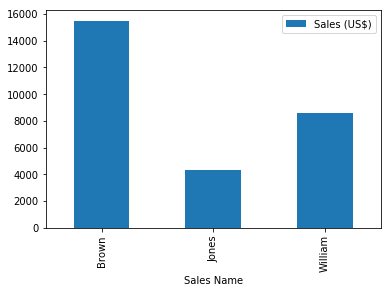

In [12]:
df5.plot(kind='bar')